# **ADS (Task- 2)**

# installing tweepy library

In [ ]:
pip install tweepy

In [ ]:
# import the module 
import tweepy 
  
# assign the values accordingly 
consumer_key = 'yVG01ZZvuAZ0IKFan6nUuy66C'
consumer_secret = 'T0fSLrnq1d2kmIFJcq3zx99Xu5GQg4Mz8k07pDrkSe3LmphXz8'
access_token = '1239936625263529984-R8dX0F7gk89c9bUk09BNuiVj6TafJZ'
access_token_secret = 'DsLVMo1ZNPGhHKCZtXNh4cJ8ZMYelUl7PfOYQzc1UDJHp'

In [ ]:
# authorization of consumer key and consumer secret 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
  
# set access to user's access key and access secret  
auth.set_access_token(access_token, access_token_secret) 
  
# calling the api  
api = tweepy.API(auth) 

# XXXXXXXXXXXXXXXXXXXXXXXXXX

# **Data Preprocessing**

# **Getting Tweets of `user 1` (realDonaldTrump)**

In [ ]:
tweets_user1 = api.user_timeline(screen_name = "realDonaldTrump",
tweet_mode = 'extended',
count = 200)

In [ ]:
tweets_user1

# Writing Tweets to a **JSON** File

In [ ]:
import json
list_of_dicts = []
for json_tweet in tweets_user1:
  list_of_dicts.append(json_tweet._json)
with open('tweet_user1.json', mode = 'w') as file:
  file.write(json.dumps(list_of_dicts, indent = 4))

# Reading Tweets from a File

In [ ]:
list = []
with open('tweet_user1.json', encoding='utf-8', mode = 'r') as file:
  list_of_dicts = json.load(file)
  for dict in list_of_dicts:
    list.append({'tweet_id': str(dict['id']),
'full_text': str(dict['full_text']),

'pictures': dict['entities'],

'hashtags': dict['entities']['hashtags'],

'posting_time': dict['created_at'],
})

# Generating a DataFrame using Tweet Info

In [ ]:
import pandas as pd
df_user1 = pd.DataFrame(list, columns = ['tweet_id',
'full_text',
'hashtags',
'pictures',
'posting_time'])

In [ ]:
df_user1.head()

,tweet_id,full_text,hashtags,pictures,posting_time
0,1315119860783906816,RT @MariaBartiromo: Tomorrow join me when i sp...,"[{'text': 'LIVE', 'indices': [77, 82]}, {'text...","{'hashtags': [{'text': 'LIVE', 'indices': [77,...",Sun Oct 11 02:39:43 +0000 2020
1,1315106212543975425,FDR’s own party told him you cannot PACK the U...,[],"{'hashtags': [], 'symbols': [], 'user_mentions...",Sun Oct 11 01:45:29 +0000 2020
2,1315104829363105793,https://t.co/BEzp7WEoV4,[],"{'hashtags': [], 'symbols': [], 'user_mentions...",Sun Oct 11 01:39:59 +0000 2020
3,1315099628023492608,https://t.co/HrEVCQtya1,[],"{'hashtags': [], 'symbols': [], 'user_mentions...",Sun Oct 11 01:19:19 +0000 2020
4,1315096028492820481,https://t.co/CMNUGJNgYJ,[],"{'hashtags': [], 'symbols': [], 'user_mentions...",Sun Oct 11 01:05:01 +0000 2020


In [ ]:
import numpy as np

tag = [] 
for i in df_user1["hashtags"]:
  try:
    tag.append(i[0]['text']) 
  except:
    tag.append(np.nan) 
    continue 

df_user1["hashtags"] = tag 

In [ ]:
df_user1.head()

,tweet_id,full_text,hashtags,pictures,posting_time
0,1315119860783906816,RT @MariaBartiromo: Tomorrow join me when i sp...,LIVE,"{'hashtags': [{'text': 'LIVE', 'indices': [77,...",Sun Oct 11 02:39:43 +0000 2020
1,1315106212543975425,FDR’s own party told him you cannot PACK the U...,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...",Sun Oct 11 01:45:29 +0000 2020
2,1315104829363105793,https://t.co/BEzp7WEoV4,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...",Sun Oct 11 01:39:59 +0000 2020
3,1315099628023492608,https://t.co/HrEVCQtya1,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...",Sun Oct 11 01:19:19 +0000 2020
4,1315096028492820481,https://t.co/CMNUGJNgYJ,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...",Sun Oct 11 01:05:01 +0000 2020


## pic checking

In [ ]:
pic = [] 
for i in df_user1["pictures"]:
  try:
    pic.append(i['media'][0]['media_url']) 
  except:
    pic.append(np.nan) 
    continue 

df_user1["pictures"] = pic 

In [ ]:
df_user1.head()

,tweet_id,full_text,hashtags,pictures,posting_time
0,1315119860783906816,RT @MariaBartiromo: Tomorrow join me when i sp...,LIVE,NaN,Sun Oct 11 02:39:43 +0000 2020
1,1315106212543975425,FDR’s own party told him you cannot PACK the U...,NaN,NaN,Sun Oct 11 01:45:29 +0000 2020
2,1315104829363105793,https://t.co/BEzp7WEoV4,NaN,http://pbs.twimg.com/ext_tw_video_thumb/131510...,Sun Oct 11 01:39:59 +0000 2020
3,1315099628023492608,https://t.co/HrEVCQtya1,NaN,http://pbs.twimg.com/amplify_video_thumb/13149...,Sun Oct 11 01:19:19 +0000 2020
4,1315096028492820481,https://t.co/CMNUGJNgYJ,NaN,http://pbs.twimg.com/ext_tw_video_thumb/131509...,Sun Oct 11 01:05:01 +0000 2020


## link checking

In [ ]:
pip install urlextract

In [ ]:
from urlextract import URLExtract

extractor = URLExtract()


In [ ]:
link = [] 
for i in df_user1["full_text"]:
  link.append(extractor.find_urls(i))

df_user1['links']=link

df_user1.links = df_user1.links.apply(lambda y: np.nan if len(y)==0 else y)

In [ ]:
df_user1.head()


,tweet_id,full_text,hashtags,pictures,posting_time,links
0,1315119860783906816,RT @MariaBartiromo: Tomorrow join me when i sp...,LIVE,NaN,Sun Oct 11 02:39:43 +0000 2020,NaN
1,1315106212543975425,FDR’s own party told him you cannot PACK the U...,NaN,NaN,Sun Oct 11 01:45:29 +0000 2020,NaN
2,1315104829363105793,https://t.co/BEzp7WEoV4,NaN,http://pbs.twimg.com/ext_tw_video_thumb/131510...,Sun Oct 11 01:39:59 +0000 2020,[https://t.co/BEzp7WEoV4]
3,1315099628023492608,https://t.co/HrEVCQtya1,NaN,http://pbs.twimg.com/amplify_video_thumb/13149...,Sun Oct 11 01:19:19 +0000 2020,[https://t.co/HrEVCQtya1]
4,1315096028492820481,https://t.co/CMNUGJNgYJ,NaN,http://pbs.twimg.com/ext_tw_video_thumb/131509...,Sun Oct 11 01:05:01 +0000 2020,[https://t.co/CMNUGJNgYJ]


In [ ]:
import numpy as np
import pandas as pd

df_user1['pictures'] = np.where(pd.notnull(df_user1['pictures']), 1, 0)

In [ ]:
df_user1['links'] = np.where(pd.notnull(df_user1['links']), 1, 0)

In [ ]:
df_user1['pic_or_link'] = np.where((df_user1['pictures'] == 0) & (df_user1['links'] == 0), 0, 1)

In [ ]:
df_user1

,tweet_id,full_text,hashtags,pictures,posting_time,links,pic_or_link
0,1315119860783906816,RT @MariaBartiromo: Tomorrow join me when i sp...,LIVE,0,Sun Oct 11 02:39:43 +0000 2020,0,0
1,1315106212543975425,FDR’s own party told him you cannot PACK the U...,NaN,0,Sun Oct 11 01:45:29 +0000 2020,0,0
2,1315104829363105793,https://t.co/BEzp7WEoV4,NaN,1,Sun Oct 11 01:39:59 +0000 2020,1,1
3,1315099628023492608,https://t.co/HrEVCQtya1,NaN,1,Sun Oct 11 01:19:19 +0000 2020,1,1
4,1315096028492820481,https://t.co/CMNUGJNgYJ,NaN,1,Sun Oct 11 01:05:01 +0000 2020,1,1
...,...,...,...,...,...,...,...
195,1313638359995224065,RT @paulsperry_: Never before in the history o...,NaN,0,Wed Oct 07 00:32:45 +0000 2020,0,0
196,1313638276142641156,RT @paulsperry_: The only poll that matters is...,GOTV,0,Wed Oct 07 00:32:25 +0000 2020,0,0
197,1313638243133517824,RT @15poundstogo: 9/ Cool. Strobe Talbott and...,NaN,1,Wed Oct 07 00:32:18 +0000 2020,1,1
198,1313638136463925249,RT @paulsperry_: BREAKING: House investigators...,NaN,0,Wed Oct 07 00:31:52 +0000 2020,0,0


In [ ]:
from datetime import datetime


date = [] 
for i in df_user1["posting_time"]:
  date.append(datetime.strftime(datetime.strptime(i,'%a %b %d %H:%M:%S +0000 %Y'), '%d-%m-%Y %H:%M:%S'))
df_user1['posting_time']=date

In [ ]:
df_user1.head()

,tweet_id,full_text,hashtags,pictures,posting_time,links,pic_or_link
0,1315119860783906816,RT @MariaBartiromo: Tomorrow join me when i sp...,LIVE,0,11-10-2020 02:39:43,0,0
1,1315106212543975425,FDR’s own party told him you cannot PACK the U...,NaN,0,11-10-2020 01:45:29,0,0
2,1315104829363105793,https://t.co/BEzp7WEoV4,NaN,1,11-10-2020 01:39:59,1,1
3,1315099628023492608,https://t.co/HrEVCQtya1,NaN,1,11-10-2020 01:19:19,1,1
4,1315096028492820481,https://t.co/CMNUGJNgYJ,NaN,1,11-10-2020 01:05:01,1,1


In [ ]:
date = [] 
for i in df_user1["posting_time"]:
  date.append(datetime.strftime(datetime.strptime(i,'%d-%m-%Y %H:%M:%S'), '%d-%m-%Y'))
df_user1['date']=date

In [ ]:
df_user1.head()

,tweet_id,full_text,hashtags,pictures,posting_time,links,pic_or_link,date
0,1315119860783906816,RT @MariaBartiromo: Tomorrow join me when i sp...,LIVE,0,11-10-2020 02:39:43,0,0,11-10-2020
1,1315106212543975425,FDR’s own party told him you cannot PACK the U...,NaN,0,11-10-2020 01:45:29,0,0,11-10-2020
2,1315104829363105793,https://t.co/BEzp7WEoV4,NaN,1,11-10-2020 01:39:59,1,1,11-10-2020
3,1315099628023492608,https://t.co/HrEVCQtya1,NaN,1,11-10-2020 01:19:19,1,1,11-10-2020
4,1315096028492820481,https://t.co/CMNUGJNgYJ,NaN,1,11-10-2020 01:05:01,1,1,11-10-2020


In [ ]:
date = [] 
for i in df_user1["date"]:
  date.append(datetime.strftime(datetime.strptime(i,'%d-%m-%Y'), '%m'))
df_user1['month-only']=date

In [ ]:
df_user1.head()

,tweet_id,full_text,hashtags,pictures,posting_time,links,pic_or_link,date,month-only
0,1315119860783906816,RT @MariaBartiromo: Tomorrow join me when i sp...,LIVE,0,11-10-2020 02:39:43,0,0,11-10-2020,10
1,1315106212543975425,FDR’s own party told him you cannot PACK the U...,NaN,0,11-10-2020 01:45:29,0,0,11-10-2020,10
2,1315104829363105793,https://t.co/BEzp7WEoV4,NaN,1,11-10-2020 01:39:59,1,1,11-10-2020,10
3,1315099628023492608,https://t.co/HrEVCQtya1,NaN,1,11-10-2020 01:19:19,1,1,11-10-2020,10
4,1315096028492820481,https://t.co/CMNUGJNgYJ,NaN,1,11-10-2020 01:05:01,1,1,11-10-2020,10


In [ ]:
time = [] 
for i in df_user1["posting_time"]:
  time.append(datetime.strftime(datetime.strptime(i,'%d-%m-%Y %H:%M:%S'), '%H:%M:%S'))
df_user1['time']=time

In [ ]:
time = [] 
for i in df_user1["time"]:
  time.append(datetime.strftime(datetime.strptime(i,'%H:%M:%S'), '%H'))
df_user1['hour_only']=time

In [ ]:
df_user1.head()

,tweet_id,full_text,hashtags,pictures,posting_time,links,pic_or_link,date,month-only,time,hour_only
0,1315119860783906816,RT @MariaBartiromo: Tomorrow join me when i sp...,LIVE,0,11-10-2020 02:39:43,0,0,11-10-2020,10,02:39:43,02
1,1315106212543975425,FDR’s own party told him you cannot PACK the U...,NaN,0,11-10-2020 01:45:29,0,0,11-10-2020,10,01:45:29,01
2,1315104829363105793,https://t.co/BEzp7WEoV4,NaN,1,11-10-2020 01:39:59,1,1,11-10-2020,10,01:39:59,01
3,1315099628023492608,https://t.co/HrEVCQtya1,NaN,1,11-10-2020 01:19:19,1,1,11-10-2020,10,01:19:19,01
4,1315096028492820481,https://t.co/CMNUGJNgYJ,NaN,1,11-10-2020 01:05:01,1,1,11-10-2020,10,01:05:01,01


# Cleaning up Tweets: Removing @Handle

In [ ]:
import re
import numpy as np
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt
# vectorize() evaluates pyfunc over successive tuples of the
# input arrays similar to the python map function, except it uses
# the broadcasting rules of numpy.
df_user1['full_text'] = np.vectorize(remove_pattern)(df_user1['full_text'], "@[\w]*")
print(df_user1['full_text'])

0      RT : Tomorrow join me when i speak to   #LIVE ...
1      FDR’s own party told him you cannot PACK the U...
2                                https://t.co/BEzp7WEoV4
3                                https://t.co/HrEVCQtya1
4                                https://t.co/CMNUGJNgYJ
                             ...                        
195    RT : Never before in the history of country ha...
196    RT : The only poll that matters is the poll on...
197    RT : 9/ Cool.  Strobe Talbott and Dekek Sheare...
198    RT : BREAKING: House investigators have now jo...
199    RT : BREAKING: FBI Dir Wray insisted IG redact...
Name: full_text, Length: 200, dtype: object


# Cleaning up Tweets

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
max_tweets = 199
corpus = []

In [ ]:
for i in range(0, max_tweets):
  tweet = re.sub(r'https?:\/\/\S*', '',
  df_user1['full_text'][i], flags = re.MULTILINE)
  tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet)
  tweet = tweet.lower()
  tweet = re.sub('rt', '', tweet)
  tweet = tweet.split()
  ps = PorterStemmer()
  tweet = [ps.stem(word) for word in tweet
           if not word in set(stopwords.words('english'))]
  if tweet == []: continue
  else:
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [ ]:
df_user1['full_text'] = df_user1['full_text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [ ]:
df_user1['full_text'] = df_user1['full_text'].replace(r'RT\s:\s', '', regex=True)

In [ ]:
df_user1['full_text'] = df_user1['full_text'].replace(r',', '', regex=True).replace(r':', '', regex=True).replace(r';', '', regex=True).replace(r'"', '', regex=True).replace(r'&', '', regex=True)

In [ ]:
df_user1.head()

,tweet_id,full_text,hashtags,pictures,posting_time,links,pic_or_link,date,month-only,time,hour_only
0,1315119860783906816,Tomorrow join me when i speak to #LIVE 10a...,LIVE,0,11-10-2020 02:39:43,0,0,11-10-2020,10,02:39:43,02
1,1315106212543975425,FDR’s own party told him you cannot PACK the U...,NaN,0,11-10-2020 01:45:29,0,0,11-10-2020,10,01:45:29,01
2,1315104829363105793,,NaN,1,11-10-2020 01:39:59,1,1,11-10-2020,10,01:39:59,01
3,1315099628023492608,,NaN,1,11-10-2020 01:19:19,1,1,11-10-2020,10,01:19:19,01
4,1315096028492820481,,NaN,1,11-10-2020 01:05:01,1,1,11-10-2020,10,01:05:01,01


# XXXXXXXXXXXXXXXXXXXXXXXXXX

# **Getting Tweets of `user 2` (ScottMorrisonMP)**

In [ ]:
tweets_user2 = api.user_timeline(screen_name = "ScottMorrisonMP",
tweet_mode = 'extended',
count = 200)

In [ ]:
tweets_user2

# Writing Tweets to a **JSON** File

In [ ]:
import json
list_of_dicts = []
for json_tweet in tweets_user2:
  list_of_dicts.append(json_tweet._json)
with open('tweet_user2.json', mode = 'w') as file:
  file.write(json.dumps(list_of_dicts, indent = 4))

# Reading Tweets from a File

In [ ]:
list = []
with open('tweet_user2.json', encoding='utf-8', mode = 'r') as file:
  list_of_dicts = json.load(file)
  for dict in list_of_dicts:
    list.append({'tweet_id': str(dict['id']),
'full_text': str(dict['full_text']),

'pictures': dict['entities'],

'hashtags': dict['entities']['hashtags'],

'posting_time': dict['created_at'],
})

# Generating a DataFrame using Tweet Info

In [ ]:
import pandas as pd
df_user2 = pd.DataFrame(list, columns = ['tweet_id',
'full_text',
'hashtags',
'pictures',
'posting_time'])

In [ ]:
df_user2.head()

,tweet_id,full_text,hashtags,pictures,posting_time
0,1314755248578125825,Happy 50th anniversary of independence to our ...,"[{'text': 'Fiji50', 'indices': [62, 69]}]","{'hashtags': [{'text': 'Fiji50', 'indices': [6...",Sat Oct 10 02:30:52 +0000 2020
1,1314405386804367361,RT @JoshFrydenberg: Tax cuts for 11 million Au...,[],"{'hashtags': [], 'symbols': [], 'user_mentions...",Fri Oct 09 03:20:39 +0000 2020
2,1314385066206720000,RT @LiberalAus: Good news for families and our...,"[{'text': 'Budget2020', 'indices': [60, 71]}, ...","{'hashtags': [{'text': 'Budget2020', 'indices'...",Fri Oct 09 01:59:54 +0000 2020
3,1314116497518653440,No better candidate that Australia could ever ...,[],"{'hashtags': [], 'symbols': [], 'user_mentions...",Thu Oct 08 08:12:42 +0000 2020
4,1313652137016979457,We’re investing more in infrastructure now in ...,"[{'text': 'Budget2020', 'indices': [46, 57]}]","{'hashtags': [{'text': 'Budget2020', 'indices'...",Wed Oct 07 01:27:30 +0000 2020


In [ ]:
tag = [] 
for i in df_user2["hashtags"]:
  try:
    tag.append(i[0]['text']) 
  except:
    tag.append(np.nan) 
    continue 

df_user2["hashtags"] = tag 

In [ ]:
df_user2.head()

,tweet_id,full_text,hashtags,pictures,posting_time
0,1314755248578125825,Happy 50th anniversary of independence to our ...,Fiji50,"{'hashtags': [{'text': 'Fiji50', 'indices': [6...",Sat Oct 10 02:30:52 +0000 2020
1,1314405386804367361,RT @JoshFrydenberg: Tax cuts for 11 million Au...,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...",Fri Oct 09 03:20:39 +0000 2020
2,1314385066206720000,RT @LiberalAus: Good news for families and our...,Budget2020,"{'hashtags': [{'text': 'Budget2020', 'indices'...",Fri Oct 09 01:59:54 +0000 2020
3,1314116497518653440,No better candidate that Australia could ever ...,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...",Thu Oct 08 08:12:42 +0000 2020
4,1313652137016979457,We’re investing more in infrastructure now in ...,Budget2020,"{'hashtags': [{'text': 'Budget2020', 'indices'...",Wed Oct 07 01:27:30 +0000 2020


## pic checking

In [ ]:
pic = [] 
for i in df_user2["pictures"]:
  try:
    pic.append(i['media'][0]['media_url']) 
  except:
    pic.append(np.nan) 
    continue 

df_user2["pictures"] = pic 

In [ ]:
df_user2.head()

,tweet_id,full_text,hashtags,pictures,posting_time
0,1314755248578125825,Happy 50th anniversary of independence to our ...,Fiji50,NaN,Sat Oct 10 02:30:52 +0000 2020
1,1314405386804367361,RT @JoshFrydenberg: Tax cuts for 11 million Au...,NaN,NaN,Fri Oct 09 03:20:39 +0000 2020
2,1314385066206720000,RT @LiberalAus: Good news for families and our...,Budget2020,http://pbs.twimg.com/media/Ej2eqT1UYAEPCWV.png,Fri Oct 09 01:59:54 +0000 2020
3,1314116497518653440,No better candidate that Australia could ever ...,NaN,NaN,Thu Oct 08 08:12:42 +0000 2020
4,1313652137016979457,We’re investing more in infrastructure now in ...,Budget2020,NaN,Wed Oct 07 01:27:30 +0000 2020


## link checking

In [ ]:
link = [] 
for i in df_user2["full_text"]:
  link.append(extractor.find_urls(i))

df_user2['links']=link

df_user2.links = df_user2.links.apply(lambda y: np.nan if len(y)==0 else y)

In [ ]:
df_user2.head()


,tweet_id,full_text,hashtags,pictures,posting_time,links
0,1314755248578125825,Happy 50th anniversary of independence to our ...,Fiji50,NaN,Sat Oct 10 02:30:52 +0000 2020,[https://t.co/KeZjMmMIHs]
1,1314405386804367361,RT @JoshFrydenberg: Tax cuts for 11 million Au...,NaN,NaN,Fri Oct 09 03:20:39 +0000 2020,NaN
2,1314385066206720000,RT @LiberalAus: Good news for families and our...,Budget2020,http://pbs.twimg.com/media/Ej2eqT1UYAEPCWV.png,Fri Oct 09 01:59:54 +0000 2020,[https://t.co/L8W93Jw6ks]
3,1314116497518653440,No better candidate that Australia could ever ...,NaN,NaN,Thu Oct 08 08:12:42 +0000 2020,[https://t.co/7A6zbvuKwg]
4,1313652137016979457,We’re investing more in infrastructure now in ...,Budget2020,NaN,Wed Oct 07 01:27:30 +0000 2020,[https://t.co/v4NF1JbYoz]


In [ ]:
import numpy as np
import pandas as pd

df_user2['pictures'] = np.where(pd.notnull(df_user2['pictures']), 1, 0)

In [ ]:
df_user2['links'] = np.where(pd.notnull(df_user2['links']), 1, 0)

In [ ]:
df_user2['pic_or_link'] = np.where((df_user2['pictures'] == 0) & (df_user2['links'] == 0), 0, 1)

In [ ]:
df_user2.head()

,tweet_id,full_text,hashtags,pictures,posting_time,links,pic_or_link
0,1314755248578125825,Happy 50th anniversary of independence to our ...,Fiji50,0,Sat Oct 10 02:30:52 +0000 2020,1,1
1,1314405386804367361,RT @JoshFrydenberg: Tax cuts for 11 million Au...,NaN,0,Fri Oct 09 03:20:39 +0000 2020,0,0
2,1314385066206720000,RT @LiberalAus: Good news for families and our...,Budget2020,1,Fri Oct 09 01:59:54 +0000 2020,1,1
3,1314116497518653440,No better candidate that Australia could ever ...,NaN,0,Thu Oct 08 08:12:42 +0000 2020,1,1
4,1313652137016979457,We’re investing more in infrastructure now in ...,Budget2020,0,Wed Oct 07 01:27:30 +0000 2020,1,1


In [ ]:
from datetime import datetime


date = [] 
for i in df_user2["posting_time"]:
  date.append(datetime.strftime(datetime.strptime(i,'%a %b %d %H:%M:%S +0000 %Y'), '%d-%m-%Y %H:%M:%S'))
df_user2['posting_time']=date

In [ ]:
df_user2.head()

,tweet_id,full_text,hashtags,pictures,posting_time,links,pic_or_link
0,1314755248578125825,Happy 50th anniversary of independence to our ...,Fiji50,0,10-10-2020 02:30:52,1,1
1,1314405386804367361,RT @JoshFrydenberg: Tax cuts for 11 million Au...,NaN,0,09-10-2020 03:20:39,0,0
2,1314385066206720000,RT @LiberalAus: Good news for families and our...,Budget2020,1,09-10-2020 01:59:54,1,1
3,1314116497518653440,No better candidate that Australia could ever ...,NaN,0,08-10-2020 08:12:42,1,1
4,1313652137016979457,We’re investing more in infrastructure now in ...,Budget2020,0,07-10-2020 01:27:30,1,1


In [ ]:
date = [] 
for i in df_user2["posting_time"]:
  date.append(datetime.strftime(datetime.strptime(i,'%d-%m-%Y %H:%M:%S'), '%d-%m-%Y'))
df_user2['date']=date

In [ ]:
df_user2.head()

,tweet_id,full_text,hashtags,pictures,posting_time,links,pic_or_link,date
0,1314755248578125825,Happy 50th anniversary of independence to our ...,Fiji50,0,10-10-2020 02:30:52,1,1,10-10-2020
1,1314405386804367361,RT @JoshFrydenberg: Tax cuts for 11 million Au...,NaN,0,09-10-2020 03:20:39,0,0,09-10-2020
2,1314385066206720000,RT @LiberalAus: Good news for families and our...,Budget2020,1,09-10-2020 01:59:54,1,1,09-10-2020
3,1314116497518653440,No better candidate that Australia could ever ...,NaN,0,08-10-2020 08:12:42,1,1,08-10-2020
4,1313652137016979457,We’re investing more in infrastructure now in ...,Budget2020,0,07-10-2020 01:27:30,1,1,07-10-2020


In [ ]:
date = [] 
for i in df_user2["date"]:
  date.append(datetime.strftime(datetime.strptime(i,'%d-%m-%Y'), '%m'))
df_user2['month-only']=date

In [ ]:
df_user2.head()

,tweet_id,full_text,hashtags,pictures,posting_time,links,pic_or_link,date,month-only
0,1314755248578125825,Happy 50th anniversary of independence to our ...,Fiji50,0,10-10-2020 02:30:52,1,1,10-10-2020,10
1,1314405386804367361,RT @JoshFrydenberg: Tax cuts for 11 million Au...,NaN,0,09-10-2020 03:20:39,0,0,09-10-2020,10
2,1314385066206720000,RT @LiberalAus: Good news for families and our...,Budget2020,1,09-10-2020 01:59:54,1,1,09-10-2020,10
3,1314116497518653440,No better candidate that Australia could ever ...,NaN,0,08-10-2020 08:12:42,1,1,08-10-2020,10
4,1313652137016979457,We’re investing more in infrastructure now in ...,Budget2020,0,07-10-2020 01:27:30,1,1,07-10-2020,10


In [ ]:
time = [] 
for i in df_user2["posting_time"]:
  time.append(datetime.strftime(datetime.strptime(i,'%d-%m-%Y %H:%M:%S'), '%H:%M:%S'))
df_user2['time']=time

In [ ]:
time = [] 
for i in df_user2["time"]:
  time.append(datetime.strftime(datetime.strptime(i,'%H:%M:%S'), '%H'))
df_user2['hour_only']=time

In [ ]:
df_user2.head()

,tweet_id,full_text,hashtags,pictures,posting_time,links,pic_or_link,date,month-only,time,hour_only
0,1314755248578125825,Happy 50th anniversary of independence to our ...,Fiji50,0,10-10-2020 02:30:52,1,1,10-10-2020,10,02:30:52,02
1,1314405386804367361,RT @JoshFrydenberg: Tax cuts for 11 million Au...,NaN,0,09-10-2020 03:20:39,0,0,09-10-2020,10,03:20:39,03
2,1314385066206720000,RT @LiberalAus: Good news for families and our...,Budget2020,1,09-10-2020 01:59:54,1,1,09-10-2020,10,01:59:54,01
3,1314116497518653440,No better candidate that Australia could ever ...,NaN,0,08-10-2020 08:12:42,1,1,08-10-2020,10,08:12:42,08
4,1313652137016979457,We’re investing more in infrastructure now in ...,Budget2020,0,07-10-2020 01:27:30,1,1,07-10-2020,10,01:27:30,01


# Cleaning up Tweets: Removing @Handle

In [ ]:
df_user2['full_text'] = np.vectorize(remove_pattern)(df_user2['full_text'], "@[\w]*")
print(df_user2['full_text'])

0      Happy 50th anniversary of independence to our ...
1      RT : Tax cuts for 11 million Australians have ...
2      RT : Good news for families and our economy. 👇...
3      No better candidate that Australia could ever ...
4      We’re investing more in infrastructure now in ...
                             ...                        
195    Was very pleased to hear his wife Sophie was r...
196    Today I spoke to Canadian PM  to swap notes an...
197    Over $1.1 billion in Federal Government assist...
198    As of 8am today, over 113,000 Australian busin...
199    RT : Today, the Morrison Government announced ...
Name: full_text, Length: 200, dtype: object


# Cleaning up Tweets

In [ ]:
for i in range(0, max_tweets):
  tweet = re.sub(r'https?:\/\/\S*', '',
  df_user2['full_text'][i], flags = re.MULTILINE)
  tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet)
  tweet = tweet.lower()
  tweet = re.sub('rt', '', tweet)
  tweet = tweet.split()
  ps = PorterStemmer()
  tweet = [ps.stem(word) for word in tweet
           if not word in set(stopwords.words('english'))]
  if tweet == []: continue
  else:
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [ ]:
df_user2['full_text'] = df_user2['full_text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [ ]:
df_user2['full_text'] = df_user2['full_text'].replace(r'RT\s:\s', '', regex=True)

In [ ]:
df_user2['full_text'] = df_user2['full_text'].replace(r',', '', regex=True).replace(r':', '', regex=True).replace(r';', '', regex=True).replace(r'"', '', regex=True).replace(r'&', '', regex=True)

In [ ]:
df_user2.head()

,tweet_id,full_text,hashtags,pictures,posting_time,links,pic_or_link,date,month-only,time,hour_only
0,1314755248578125825,Happy 50th anniversary of independence to our ...,Fiji50,0,10-10-2020 02:30:52,1,1,10-10-2020,10,02:30:52,02
1,1314405386804367361,Tax cuts for 11 million Australians have been ...,NaN,0,09-10-2020 03:20:39,0,0,09-10-2020,10,03:20:39,03
2,1314385066206720000,Good news for families and our economy. 👇👇👇 #B...,Budget2020,1,09-10-2020 01:59:54,1,1,09-10-2020,10,01:59:54,01
3,1314116497518653440,No better candidate that Australia could ever ...,NaN,0,08-10-2020 08:12:42,1,1,08-10-2020,10,08:12:42,08
4,1313652137016979457,We’re investing more in infrastructure now in ...,Budget2020,0,07-10-2020 01:27:30,1,1,07-10-2020,10,01:27:30,01


# XXXXXXXXXXXXXXXXXXXXXXXXXX

# Writing both DataFrames to a **CSV** File

In [ ]:
df=pd.concat([df_user1,df_user2])

In [ ]:
# Writing the DataFrame to a csv file.
df.to_csv('tweet_data.csv')

# XXXXXXXXXXXXXXXXXXXXXXXXXX

# **1) Pandas to plot the posting times of the tweets for the two users; the aim of the plot is to distinguish the two users.**

## Plotting posting times of user 1 (Donald Trump)

09-10-2020 01:30:16    3
08-10-2020 19:31:02    2
08-10-2020 19:32:13    1
07-10-2020 01:27:02    1
09-10-2020 15:13:00    1
                      ..
08-10-2020 02:23:49    1
07-10-2020 01:40:28    1
07-10-2020 23:38:09    1
09-10-2020 15:41:42    1
07-10-2020 14:51:29    1
Name: posting_time, Length: 197, dtype: int64


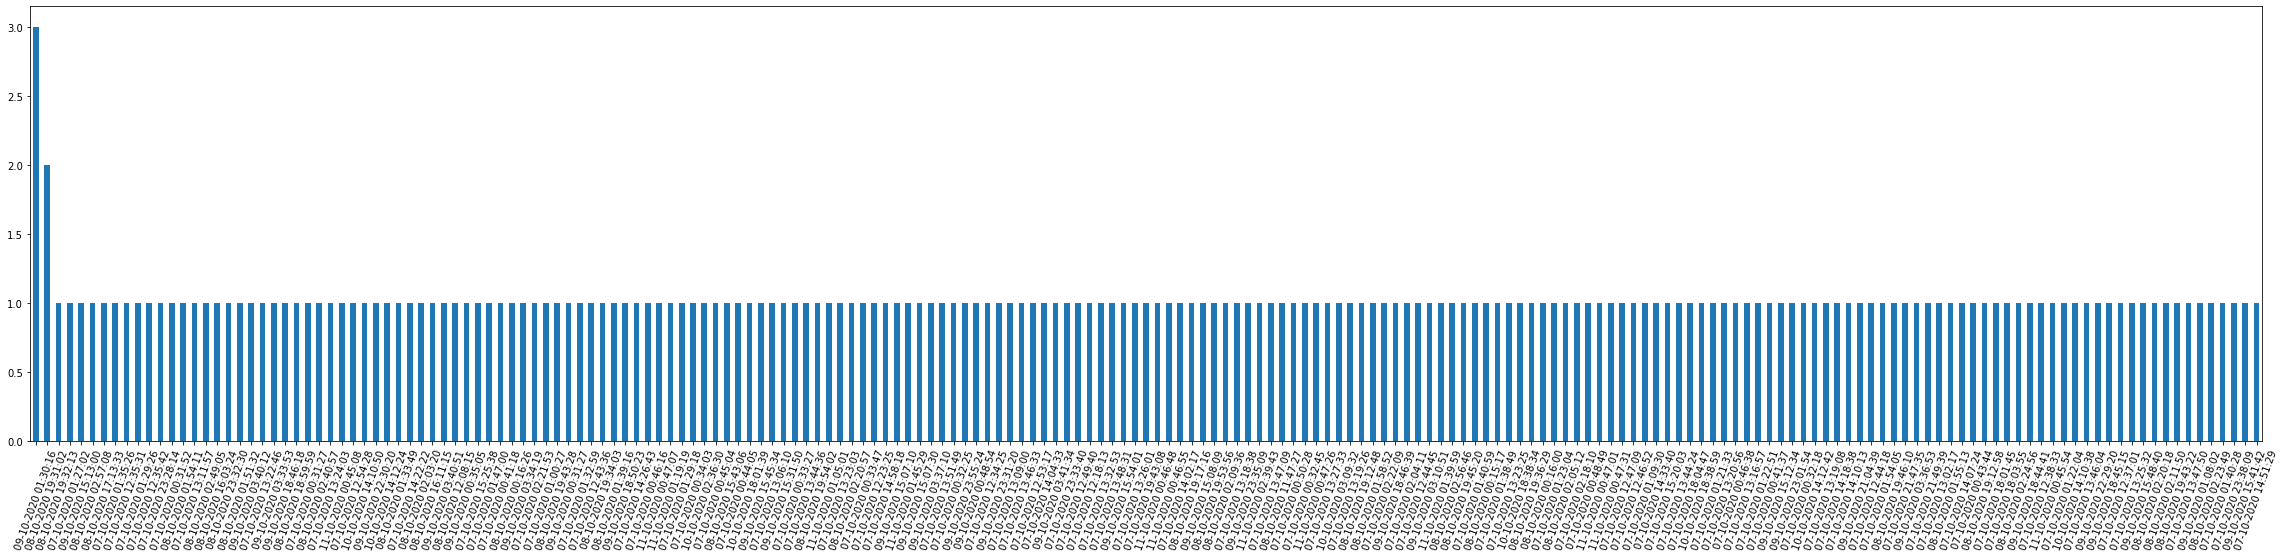

In [ ]:
dt=df_user1['posting_time'].value_counts()
print(dt)
dt.plot.bar(x=df_user1.index, rot=70, figsize=(40,8))

## Bar plot for exact date

07-10-2020    98
08-10-2020    43
09-10-2020    37
11-10-2020    13
10-10-2020     9
Name: date, dtype: int64


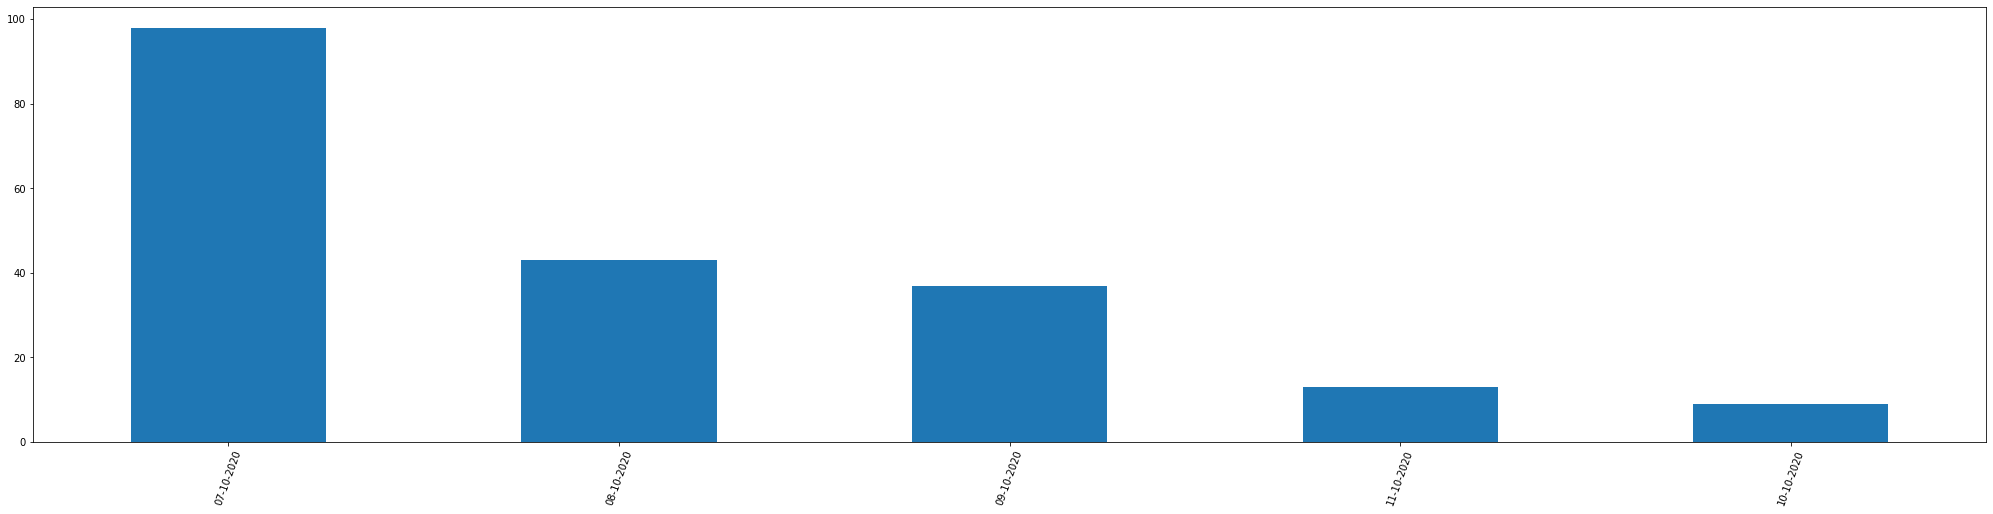

In [ ]:
d=df_user1['date'].value_counts()


print(d)
d.plot.bar(x=df_user1.index, rot=70, figsize=(35,8))

## Line plot for exact tweet hour

00    31
01    30
13    25
02    18
12    16
19    15
14    14
15    13
18    12
03     9
23     8
21     3
16     2
22     2
11     1
17     1
Name: hour_only, dtype: int64


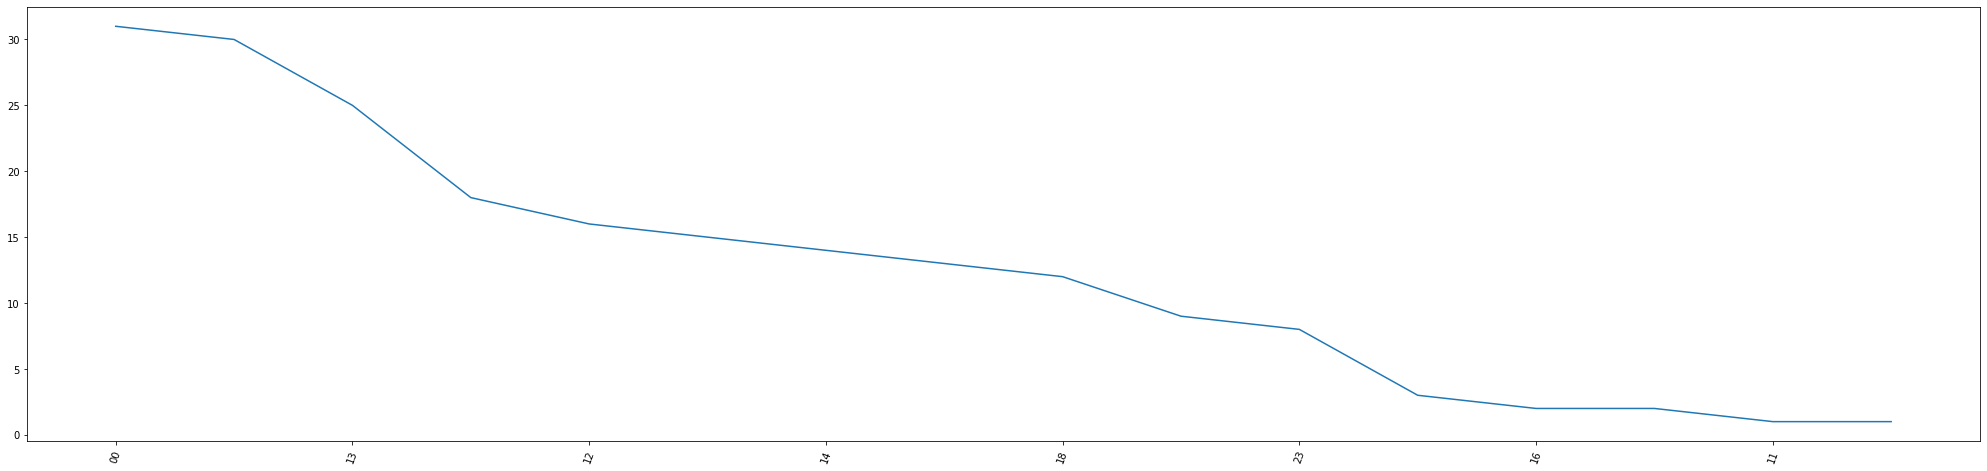

In [ ]:
h=df_user1['hour_only'].value_counts()
print(h)
h.plot.line(x=df_user1.index, rot=70, figsize=(35,8))

# XXXXXXXXXXXXXXXX

## Plotting posting times of user 2 (Scott Morrison)

28-08-2020 08:51:23    3
21-07-2020 01:34:54    2
05-07-2020 00:18:30    2
17-07-2020 03:33:33    2
26-05-2020 06:51:09    2
                      ..
01-04-2020 09:04:56    1
02-10-2020 00:10:17    1
10-06-2020 04:24:44    1
23-04-2020 01:48:26    1
15-08-2020 03:39:24    1
Name: posting_time, Length: 188, dtype: int64


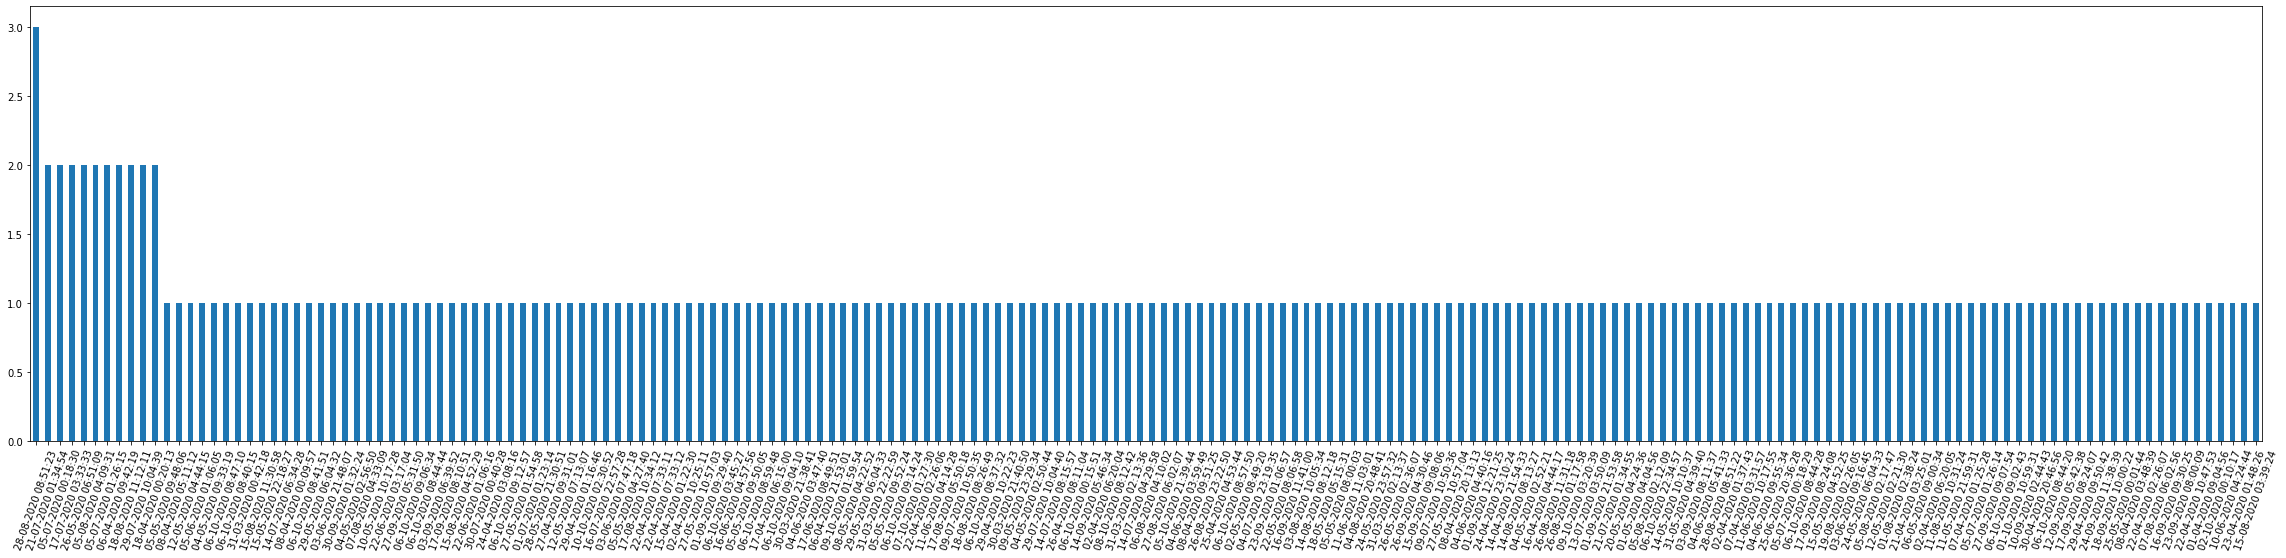

In [ ]:
dt=df_user2['posting_time'].value_counts()
print(dt)
dt.plot.bar(x=df_user2.index, rot=70, figsize=(40,8))

## Bar plot for exact date

06-10-2020    17
05-07-2020     6
08-04-2020     5
05-05-2020     5
22-04-2020     5
              ..
27-04-2020     1
14-09-2020     1
01-04-2020     1
20-05-2020     1
31-05-2020     1
Name: date, Length: 100, dtype: int64


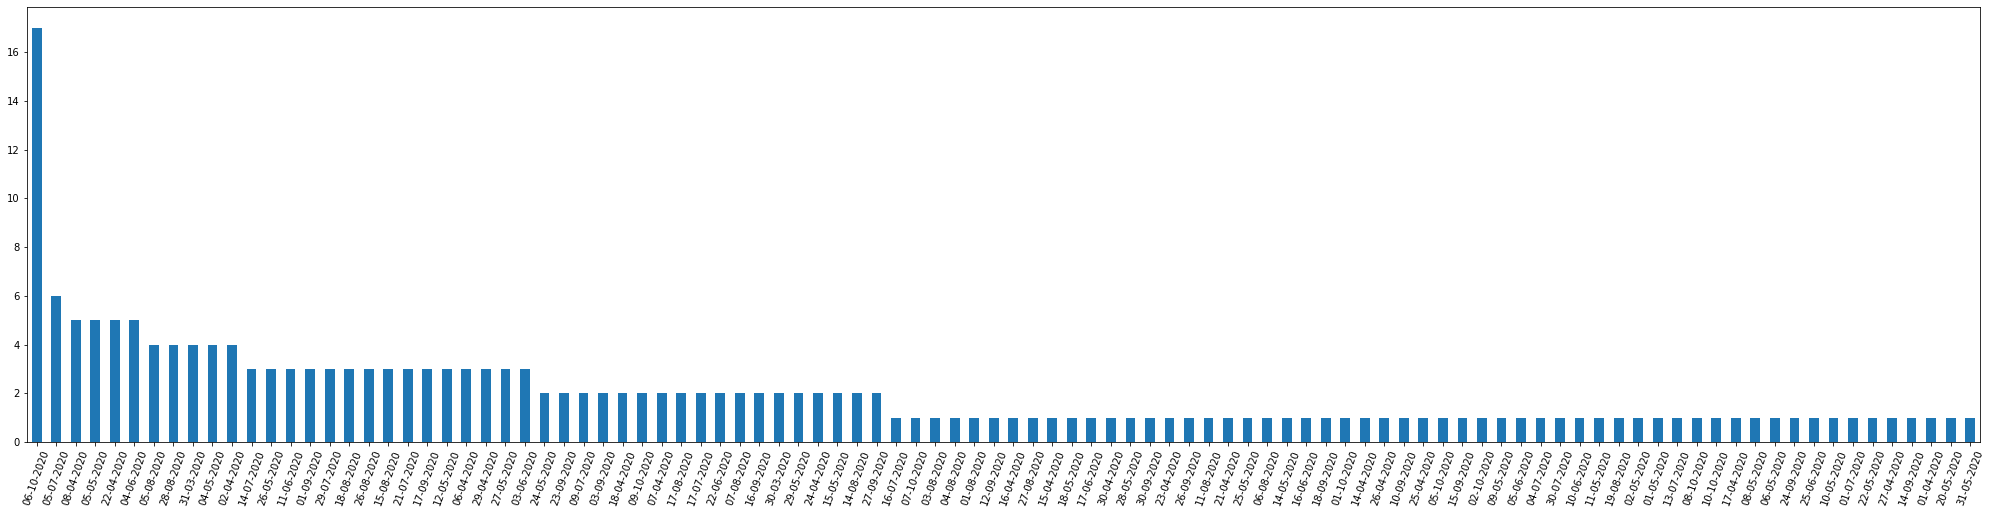

In [ ]:
d=df_user2['date'].value_counts()


print(d)
d.plot.bar(x=df_user2.index, rot=70, figsize=(35,8))

## Line plot for exact tweet hour

08    28
09    22
01    20
04    20
10    18
02    15
03    13
06    12
00    11
21     9
05     7
11     7
23     5
20     4
07     4
22     4
12     1
Name: hour_only, dtype: int64


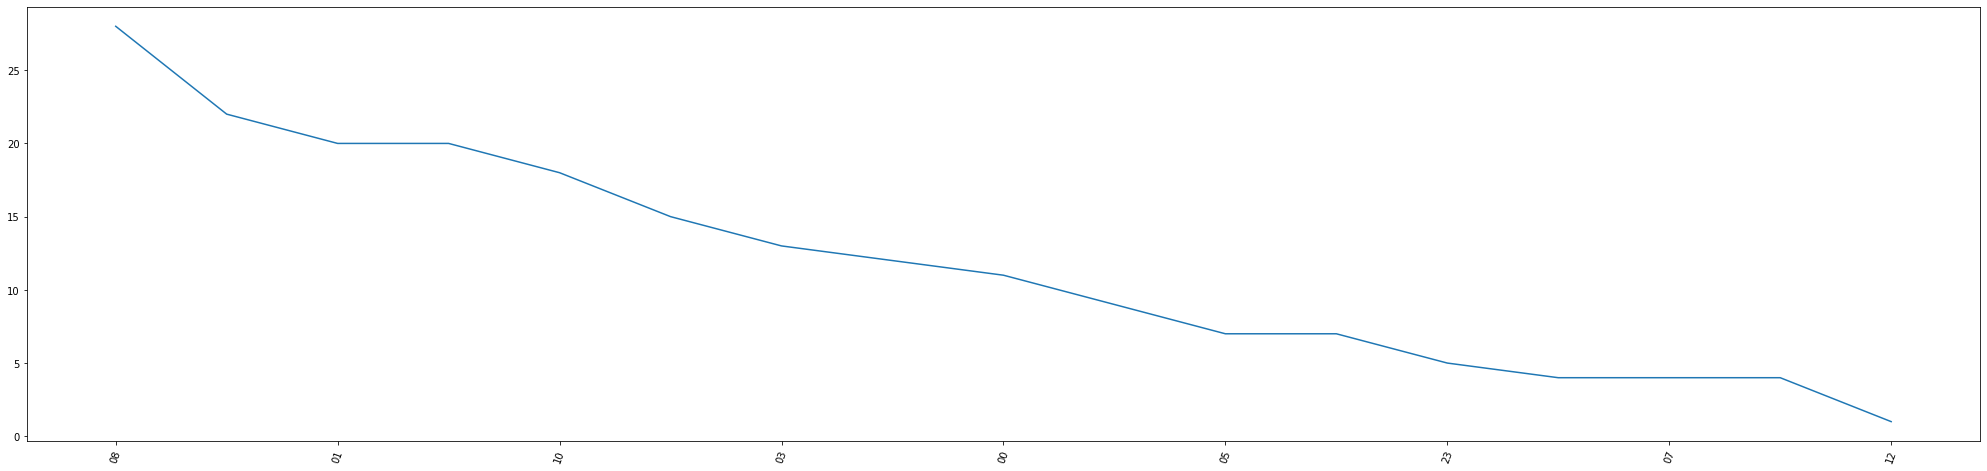

In [ ]:
h=df_user2['hour_only'].value_counts()
print(h)
h.plot.line(x=df_user2.index, rot=70, figsize=(35,8))

# **Conclusion of 1): From the bar plots of two users, we got to know that:**  
`user 1` posted 4 tweets on 06-10-2020 18:48:47, 3 tweets on 09-10-2020 01:30:16 , and 2 tweets on 08-10-2020 19:31:02. However, all other tweets have different posting times.

`user 1` posted more than half of the tweets on 07-10-2020.

As per the Australian timing, `user 1` posted highest number of posts i.e. 34 at midnight, besides `user 1` posted 88 tweets out of 200 between midnight and 3 am. 

`user 2` posted 3 tweets on 28-08-2020 08:51:23, then 2 tweets on each of the 10 different days. However, all other tweets have different posting times.

`user 2` posted 17 the tweets on 06-10-2020.

`user 2` posted 34% of the tweets between 8pm & 10pm. Besides, approximately 25% of the tweets posted in the afternoon and approximately 40 out of 200 of tweets in the evening.

# **2) Pandas to construct a bar chart of the proportions of tweets for each of the two users that contain pictures or links.**

## Plotting proportions of tweets for user 1 (Donald Trump) that contain pictures or links.

1    104
0     96
Name: pic_or_link, dtype: int64


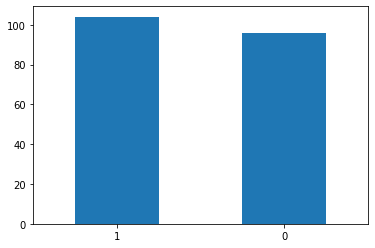

In [ ]:
p_or_l=df_user1.pic_or_link.value_counts() 
print(p_or_l)
p_or_l.plot.bar(x=df_user1.index, rot=0)

## Plotting proportions of tweets for user 2 (Scott Morrison) that contain pictures or links.

1    127
0     73
Name: pic_or_link, dtype: int64


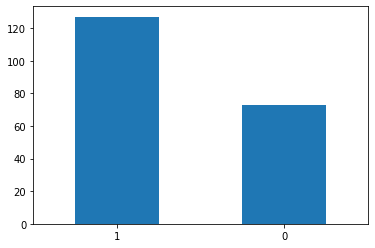

In [ ]:
p_or_l=df_user2.pic_or_link.value_counts() 
print(p_or_l)
p_or_l.plot.bar(x=df_user2.index, rot=0)

# **Conclusion of 2): From plotting proportions of two users that contain pictures or links, we got to know that:**  
48% tweets of `user 1` contain pictures or links, while 52% tweets of `user 1` does not contain pictures or links.

63.5% tweets of `user 2` contain pictures or links, while 36.5% tweets of `user 2` does not contain pictures or links.

# **3) Pandas to construct a histogram of the number of hashtags in tweets for each of the two users.**

## Plotting number of hashtags in tweets for user 1 (Donald Trump).

In [ ]:
df_user1['hashtags'].fillna(value=0,inplace=True)

0                           174
Obamagate                     4
MAGA                          3
Obama                         2
Delta                         2
LIVE                          1
LESM                          1
SC01                          1
TrumpDerangementSyndrome      1
TrumpPence2020                1
VOTE                          1
OperationLadyJustice          1
AmyConeyBarrett               1
GOTV                          1
2A                            1
NM02                          1
Texas                         1
AZ01                          1
LetsDoThis                    1
ME02                          1
Name: hashtags, dtype: int64


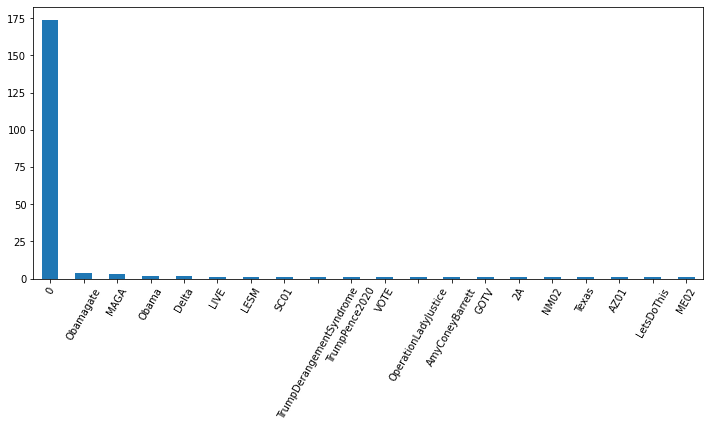

In [ ]:
h=df_user1.hashtags.value_counts() 
print(h)
h.plot.bar(x=df_user1.index, rot=60, figsize=(12,5))

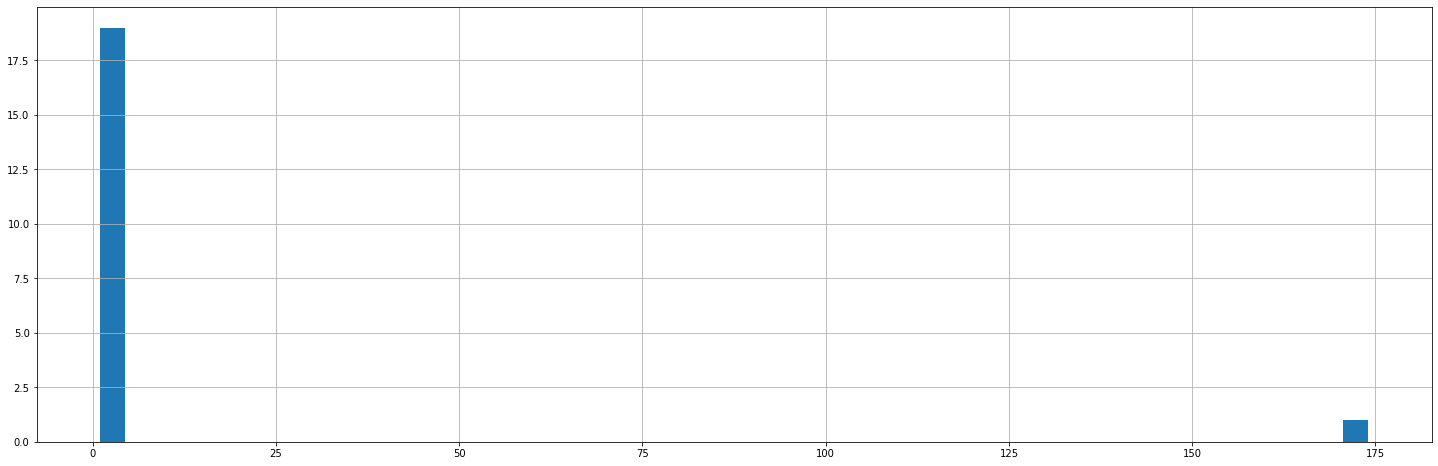

In [ ]:
h.hist(figsize=(25,8), bins = 50)

## Plotting number of hashtags in tweets for user 2 (Scott Morrison).

In [ ]:
df_user2['hashtags'].fillna(value=0,inplace=True)

0                                  115
COVID19                             19
Budget2020                          13
LIVE                                12
JobKeeper                            9
coronavirus                          8
MothersDay                           2
JobMaker                             2
ThanksForCaring                      1
strokeweek2020                       1
InternationalNursesDay               1
InternationalDayofSignLanguages      1
Watch                                1
OrganDonation                        1
digitaleconomy                       1
ALERT                                1
RUOKDay                              1
IND2020                              1
LestWeForget                         1
IACEPA                               1
Fiji50                               1
AnzacDay                             1
NationalVolunteerWeek                1
Belgium                              1
covidsafe                            1
HomeBuilder              

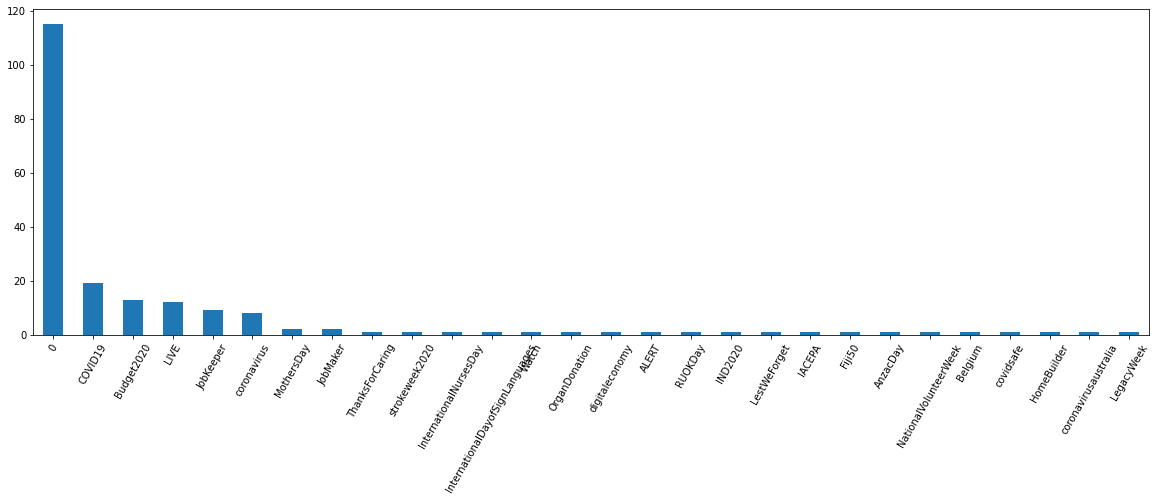

In [ ]:
h=df_user2.hashtags.value_counts() 
print(h)
h.plot.bar(x=df_user2.index, rot=60, figsize=(20,6))

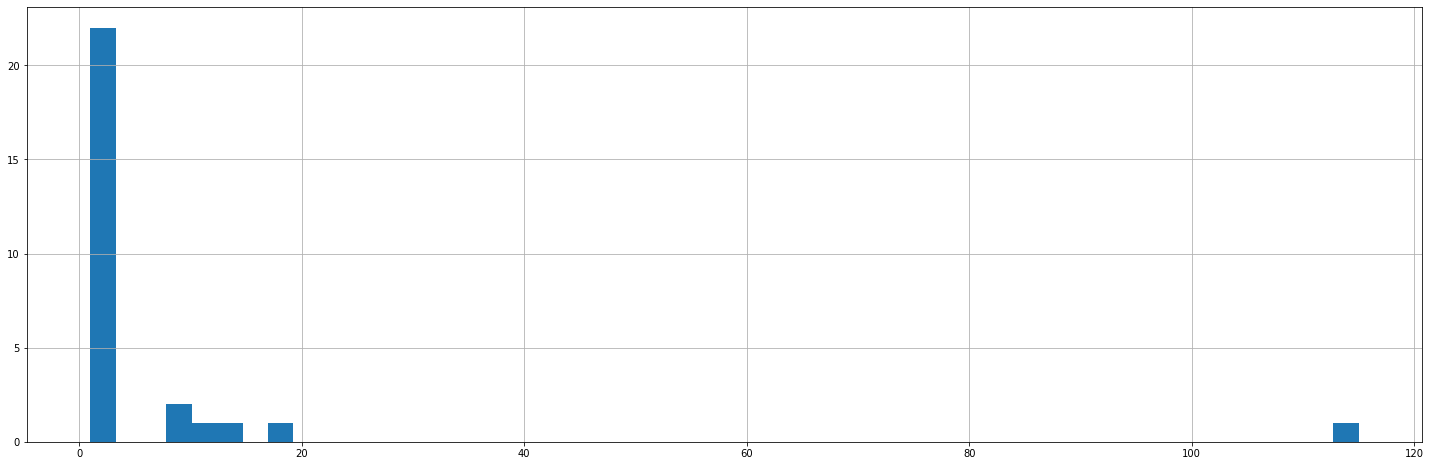

In [ ]:
h.hist(figsize=(25,8), bins = 50)

# **Conclusion of 3): From plotting number of hashtags in tweets for two users, we got to know that:**  
91% tweets of `user 1` do not have any hashtag, 2% have `#Obamagate`. However, 7% tweets of `user 1` got totally different hashtags.

57.5% tweets of `user 2` do not have any hashtag, 9.5% have `#COVID19`, 6.5% have `#Budget2020`, 6% have `#LIVE `, 4.5% have `#JobKeeper`, & 4% have `#coronavirus`. However, other tweets of `user 2` got totally different hashtags.

# **4) Calculating the log odds ratio for each word used in the set of tweets, and listing the 20 words most strongly associated with each of the two users.**

* **Calculating the log odds ratio for each word used in the set of tweets**

Counting the Most Frequent Words for `user 1`

In [ ]:
sentence1 = df_user1['full_text'].tolist()

In [ ]:
wordlist1=[]

for sentence in sentence1:
  wordlist1.append(sentence.split())

print(wordlist1)
    

[['Tomorrow', 'join', 'me', 'when', 'i', 'speak', 'to', '#LIVE', '10am', 'et', '#breakingnews', '#POTUS45', '#…'], ['FDR’s', 'own', 'party', 'told', 'him', 'you', 'cannot', 'PACK', 'the', 'United', 'States', 'Supreme', 'Court', 'it', 'would', 'permanently', 'destroy', 'the', 'Court.', 'But', 'now', 'the', 'Radical', 'Left', 'Democrats', 'are', 'pushing', 'Biden', 'to', 'do', 'this.', 'He', 'has', 'zero', 'chance', 'against', 'them!'], [], [], [], ['Oklahoma', 'we', 'need', 'in', 'Congress!', 'She', 'delivers', 'for', 'our', 'Teachers', 'amp', 'Students', 'and', 'she', 'will', 'always', 'protect', 'your', '#2A', 'amp', 'Energy', 'Jobs', 'unlike', 'her', 'opponent', 'who', 'votes', 'against', 'our', 'Oil', 'amp', 'Gas', 'industry.', 'Stephanie', 'has', 'my', 'Complete', 'and', 'Total', 'Endorsement!', '#OK05'], ['Yvette', 'Herrell', '()', 'is', 'a', 'proven', 'fighter', 'for', 'New', 'Mexico!', 'She', 'strongly', 'supports', 'our', 'Brave', 'Law', 'Enforcement', 'Life', 'and', 'the', 'Se

In [ ]:
words1 = []
while wordlist1:
  words1.extend(wordlist1.pop(0))

In [ ]:
print(words1)

['Tomorrow', 'join', 'me', 'when', 'i', 'speak', 'to', '#LIVE', '10am', 'et', '#breakingnews', '#POTUS45', '#…', 'FDR’s', 'own', 'party', 'told', 'him', 'you', 'cannot', 'PACK', 'the', 'United', 'States', 'Supreme', 'Court', 'it', 'would', 'permanently', 'destroy', 'the', 'Court.', 'But', 'now', 'the', 'Radical', 'Left', 'Democrats', 'are', 'pushing', 'Biden', 'to', 'do', 'this.', 'He', 'has', 'zero', 'chance', 'against', 'them!', 'Oklahoma', 'we', 'need', 'in', 'Congress!', 'She', 'delivers', 'for', 'our', 'Teachers', 'amp', 'Students', 'and', 'she', 'will', 'always', 'protect', 'your', '#2A', 'amp', 'Energy', 'Jobs', 'unlike', 'her', 'opponent', 'who', 'votes', 'against', 'our', 'Oil', 'amp', 'Gas', 'industry.', 'Stephanie', 'has', 'my', 'Complete', 'and', 'Total', 'Endorsement!', '#OK05', 'Yvette', 'Herrell', '()', 'is', 'a', 'proven', 'fighter', 'for', 'New', 'Mexico!', 'She', 'strongly', 'supports', 'our', 'Brave', 'Law', 'Enforcement', 'Life', 'and', 'the', 'Second', 'Amendment.'

In [ ]:
words1_new=[]

for i in words1:
  words1_new.append(i.lower())

print(words1_new) 

['tomorrow', 'join', 'me', 'when', 'i', 'speak', 'to', '#live', '10am', 'et', '#breakingnews', '#potus45', '#…', 'fdr’s', 'own', 'party', 'told', 'him', 'you', 'cannot', 'pack', 'the', 'united', 'states', 'supreme', 'court', 'it', 'would', 'permanently', 'destroy', 'the', 'court.', 'but', 'now', 'the', 'radical', 'left', 'democrats', 'are', 'pushing', 'biden', 'to', 'do', 'this.', 'he', 'has', 'zero', 'chance', 'against', 'them!', 'oklahoma', 'we', 'need', 'in', 'congress!', 'she', 'delivers', 'for', 'our', 'teachers', 'amp', 'students', 'and', 'she', 'will', 'always', 'protect', 'your', '#2a', 'amp', 'energy', 'jobs', 'unlike', 'her', 'opponent', 'who', 'votes', 'against', 'our', 'oil', 'amp', 'gas', 'industry.', 'stephanie', 'has', 'my', 'complete', 'and', 'total', 'endorsement!', '#ok05', 'yvette', 'herrell', '()', 'is', 'a', 'proven', 'fighter', 'for', 'new', 'mexico!', 'she', 'strongly', 'supports', 'our', 'brave', 'law', 'enforcement', 'life', 'and', 'the', 'second', 'amendment.'

In [ ]:
len(words1_new)

3573

Counting the Most Frequent Words for `user 2`

In [ ]:
sentence2 = df_user2['full_text'].tolist()

In [ ]:
wordlist2=[]

for sentence in sentence2:
  wordlist2.append(sentence.split())

print(wordlist2)
    

[['Happy', '50th', 'anniversary', 'of', 'independence', 'to', 'our', 'vuvale', 'in', 'Fiji!', '#Fiji50', '🇦🇺🇫🇯'], ['Tax', 'cuts', 'for', '11', 'million', 'Australians', 'have', 'been', 'secured', 'with', 'the', 'passage', 'of', 'legislation', 'through', 'the', 'Parliament', 'today.', 'Ta…'], ['Good', 'news', 'for', 'families', 'and', 'our', 'economy.', '👇👇👇', '#Budget2020', '#auspol'], ['No', 'better', 'candidate', 'that', 'Australia', 'could', 'ever', 'put', 'forward', 'for', 'Secretary-General', 'of', 'the', 'than', '.', 'Was', 'proud', 'to', 'announce', 'our', 'intention', 'to', 'formally', 'nominate', 'Mathias', 'once', 'he', 'retires', 'from', 'the', 'Parliament', 'later', 'this', 'month.'], ['We’re', 'investing', 'more', 'in', 'infrastructure', 'now', 'in', '#Budget2020', 'to', 'create', 'more', 'jobs', 'as', 'part', 'of', 'our', 'economic', 'recovery', 'plan', 'for', 'Australia.', 'These', 'investments', 'in', 'our', 'local', 'communities', 'will', 'support', 'local', 'jobs.'], 

In [ ]:
words2 = []
while wordlist2:
  words2.extend(wordlist2.pop(0))

In [ ]:
print(words2)

['Happy', '50th', 'anniversary', 'of', 'independence', 'to', 'our', 'vuvale', 'in', 'Fiji!', '#Fiji50', '🇦🇺🇫🇯', 'Tax', 'cuts', 'for', '11', 'million', 'Australians', 'have', 'been', 'secured', 'with', 'the', 'passage', 'of', 'legislation', 'through', 'the', 'Parliament', 'today.', 'Ta…', 'Good', 'news', 'for', 'families', 'and', 'our', 'economy.', '👇👇👇', '#Budget2020', '#auspol', 'No', 'better', 'candidate', 'that', 'Australia', 'could', 'ever', 'put', 'forward', 'for', 'Secretary-General', 'of', 'the', 'than', '.', 'Was', 'proud', 'to', 'announce', 'our', 'intention', 'to', 'formally', 'nominate', 'Mathias', 'once', 'he', 'retires', 'from', 'the', 'Parliament', 'later', 'this', 'month.', 'We’re', 'investing', 'more', 'in', 'infrastructure', 'now', 'in', '#Budget2020', 'to', 'create', 'more', 'jobs', 'as', 'part', 'of', 'our', 'economic', 'recovery', 'plan', 'for', 'Australia.', 'These', 'investments', 'in', 'our', 'local', 'communities', 'will', 'support', 'local', 'jobs.', 'Chatting'

In [ ]:
words2_new=[]

for i in words2:
  words2_new.append(i.lower())

print(words2_new) 

['happy', '50th', 'anniversary', 'of', 'independence', 'to', 'our', 'vuvale', 'in', 'fiji!', '#fiji50', '🇦🇺🇫🇯', 'tax', 'cuts', 'for', '11', 'million', 'australians', 'have', 'been', 'secured', 'with', 'the', 'passage', 'of', 'legislation', 'through', 'the', 'parliament', 'today.', 'ta…', 'good', 'news', 'for', 'families', 'and', 'our', 'economy.', '👇👇👇', '#budget2020', '#auspol', 'no', 'better', 'candidate', 'that', 'australia', 'could', 'ever', 'put', 'forward', 'for', 'secretary-general', 'of', 'the', 'than', '.', 'was', 'proud', 'to', 'announce', 'our', 'intention', 'to', 'formally', 'nominate', 'mathias', 'once', 'he', 'retires', 'from', 'the', 'parliament', 'later', 'this', 'month.', 'we’re', 'investing', 'more', 'in', 'infrastructure', 'now', 'in', '#budget2020', 'to', 'create', 'more', 'jobs', 'as', 'part', 'of', 'our', 'economic', 'recovery', 'plan', 'for', 'australia.', 'these', 'investments', 'in', 'our', 'local', 'communities', 'will', 'support', 'local', 'jobs.', 'chatting'

In [ ]:
len(words2_new)

6054

## Removing Stop Words

In [ ]:
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards']
stopwords += ['again', 'against', 'all', 'almost', 'alone', 'along']
stopwords += ['already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
stopwords += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
stopwords += ['because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below']
stopwords += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
stopwords += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
stopwords += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
stopwords += ['every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
stopwords += ['five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
stopwords += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
stopwords += ['herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
stopwords += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
stopwords += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
stopwords += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none']
stopwords += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
stopwords += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
stopwords += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
stopwords += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime']
stopwords += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
stopwords += ['then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they']
stopwords += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
stopwords += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
stopwords += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where']
stopwords += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
stopwords += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your']
stopwords += ['yours', 'yourself', 'yourselves']

Now getting rid of the stop words in a list is as easy as using another list comprehension. 

In [ ]:
def removeStopwords(wordlist, stopwords):
  return [w for w in wordlist if w not in stopwords]

In [ ]:
words1_new=removeStopwords(words1_new, stopwords)
print(words1_new)
total_user1=len(words1_new)
total_user1

['tomorrow', 'join', 'speak', '#live', '10am', 'et', '#breakingnews', '#potus45', '#…', 'fdr’s', 'party', 'told', 'pack', 'united', 'states', 'supreme', 'court', 'permanently', 'destroy', 'court.', 'radical', 'left', 'democrats', 'pushing', 'biden', 'this.', 'zero', 'chance', 'them!', 'oklahoma', 'need', 'congress!', 'delivers', 'teachers', 'amp', 'students', 'protect', '#2a', 'amp', 'energy', 'jobs', 'unlike', 'opponent', 'votes', 'oil', 'amp', 'gas', 'industry.', 'stephanie', 'complete', 'total', 'endorsement!', '#ok05', 'yvette', 'herrell', '()', 'proven', 'fighter', 'new', 'mexico!', 'strongly', 'supports', 'brave', 'law', 'enforcement', 'life', 'second', 'amendment.', 'strong', 'border', 'trade', 'yvette', 'complete', 'total', 'endorsement!', '#nm02', 'need', 'congress', 'fight', 'people', 'south', 'carolina!', 'strong', 'military', 'law', 'enforcement', 'veterans', 'nancy', 'america', 'agenda', 'beginning!', 'nancy', 'complete', 'total', 'endorsement!', '#sc01', 'need', 'tiffany'

2044

In [ ]:
words2_new=removeStopwords(words2_new, stopwords)
print(words2_new)
total_user2=len(words2_new)
total_user2

['happy', '50th', 'anniversary', 'independence', 'vuvale', 'fiji!', '#fiji50', '🇦🇺🇫🇯', 'tax', 'cuts', '11', 'million', 'australians', 'secured', 'passage', 'legislation', 'parliament', 'today.', 'ta…', 'good', 'news', 'families', 'economy.', '👇👇👇', '#budget2020', '#auspol', 'better', 'candidate', 'australia', 'forward', 'secretary-general', '.', 'proud', 'announce', 'intention', 'formally', 'nominate', 'mathias', 'retires', 'parliament', 'later', 'month.', 'we’re', 'investing', 'infrastructure', '#budget2020', 'create', 'jobs', 'economic', 'recovery', 'plan', 'australia.', 'investments', 'local', 'communities', 'support', 'local', 'jobs.', 'chatting', 'things', '#budget2020', '-', 'economic', 'recovery', 'plan', 'we’re', 'getting', 'australians', 'jobs', 'rebuilding', 'economy', 'securing', 'future.', '#budget2020', '.', 'morrison', 'government’s', 'message', 'australians', 'back.', '#budget2020', 'we’re', 'delivering', 'additional', '$250', 'support', 'payments', '5.1', 'million', 'au

3230

## **Common words for both the users**

In [ ]:
s = set(words2_new)
list3 = [x for x in words1_new if x in s]
list3

['tomorrow',
 'join',
 'speak',
 '#live',
 'states',
 'left',
 'need',
 'delivers',
 'amp',
 'protect',
 'amp',
 'energy',
 'jobs',
 'amp',
 'new',
 'supports',
 'brave',
 'life',
 'second',
 'strong',
 'trade',
 'need',
 'fight',
 'people',
 'strong',
 'veterans',
 'need',
 'fight',
 'people',
 'tremendous',
 'second',
 'tremendous',
 'create',
 'jobs.',
 'amp',
 'second',
 'amp',
 'tremendous',
 'people',
 'fight',
 'small',
 'businesses',
 'amp',
 'incredible',
 'true',
 'president',
 'formally',
 'missing',
 'amp',
 'today',
 'proud',
 'amp',
 'million',
 'support',
 'public',
 'amp',
 'like',
 'supported',
 'major',
 'stand',
 'congratulations',
 'president',
 'freedom',
 'country',
 'fight',
 'stand',
 'live',
 'president',
 'delivers',
 'amp',
 'announced',
 'received',
 'candidate',
 'new',
 'jersey',
 'employee',
 'nearly',
 'received',
 'safe',
 'read',
 'receive',
 'police',
 'thank',
 'president',
 'share',
 'reveal',
 '.',
 'got',
 'caught',
 'lost',
 'thank',
 '.',
 'toda

In [ ]:
words1_n=[]

words1_n = [e for e in words1_new if e in list3]
words1_n

['tomorrow',
 'join',
 'speak',
 '#live',
 'states',
 'left',
 'need',
 'delivers',
 'amp',
 'protect',
 'amp',
 'energy',
 'jobs',
 'amp',
 'new',
 'supports',
 'brave',
 'life',
 'second',
 'strong',
 'trade',
 'need',
 'fight',
 'people',
 'strong',
 'veterans',
 'need',
 'fight',
 'people',
 'tremendous',
 'second',
 'tremendous',
 'create',
 'jobs.',
 'amp',
 'second',
 'amp',
 'tremendous',
 'people',
 'fight',
 'small',
 'businesses',
 'amp',
 'incredible',
 'true',
 'president',
 'formally',
 'missing',
 'amp',
 'today',
 'proud',
 'amp',
 'million',
 'support',
 'public',
 'amp',
 'like',
 'supported',
 'major',
 'stand',
 'congratulations',
 'president',
 'freedom',
 'country',
 'fight',
 'stand',
 'live',
 'president',
 'delivers',
 'amp',
 'announced',
 'received',
 'candidate',
 'new',
 'jersey',
 'employee',
 'nearly',
 'received',
 'safe',
 'read',
 'receive',
 'police',
 'thank',
 'president',
 'share',
 'reveal',
 '.',
 'got',
 'caught',
 'lost',
 'thank',
 '.',
 'toda

In [ ]:
words2_n=[]

words2_n = [e for e in words2_new if e in list3]
words2_n

['tax',
 'million',
 'news',
 'better',
 'candidate',
 'forward',
 '.',
 'proud',
 'formally',
 'create',
 'jobs',
 'plan',
 'local',
 'support',
 'local',
 'jobs.',
 'things',
 '-',
 'plan',
 'getting',
 'jobs',
 'economy',
 '.',
 'message',
 'back.',
 'support',
 'million',
 'income',
 'support',
 'including',
 'help',
 'providing',
 'bring',
 'schools',
 'million',
 'stop',
 'plan',
 'million',
 'receive',
 'tax',
 'relief',
 'million',
 'tax',
 'cut',
 '1',
 'year',
 'plan',
 'create',
 'jobs',
 'economy',
 'future',
 'people',
 'tax',
 'relief',
 'support',
 'nearly',
 'million',
 'job',
 'new',
 'jobs.',
 'live',
 'delivers',
 'federal',
 '2020',
 'run',
 'plan',
 'create',
 'jobs',
 'economy',
 'tonight',
 'watch',
 'tonight',
 'plan',
 'tonight',
 'amp',
 'plan',
 'create',
 'jobs',
 'economy',
 'amp',
 'congratulations',
 'prime',
 'minister',
 'look',
 'forward',
 'working',
 'closely',
 'forward',
 'leadership',
 'role',
 'middle',
 'east',
 'strong',
 'trade',
 'amp',
 'lif

## Common words series of both the users

In [ ]:
words1=pd.Series(words1_n).value_counts()
words1

amp          23
president    17
great        14
people       12
vote         12
             ..
coming        1
ago           1
women         1
announced     1
single        1
Length: 238, dtype: int64

In [ ]:
words2=pd.Series(words2_n).value_counts()
words2

amp         32
today       32
jobs        31
thank       23
new         22
            ..
east         1
speak        1
cares        1
received     1
single       1
Length: 238, dtype: int64

# **Calculating the log odds ratio**

In [ ]:
import math 

new_words=[]
new_log_rat=[]



for i in list3:
  new_words.append(i)
  X=((words1[i]+1)/(total_user1+1))/((words2[i]+1)/(total_user2+1))
  x=math.log2(X)
  new_log_rat.append(x)

print(new_words)
print(new_log_rat)

['tomorrow', 'join', 'speak', '#live', 'states', 'left', 'need', 'delivers', 'amp', 'protect', 'amp', 'energy', 'jobs', 'amp', 'new', 'supports', 'brave', 'life', 'second', 'strong', 'trade', 'need', 'fight', 'people', 'strong', 'veterans', 'need', 'fight', 'people', 'tremendous', 'second', 'tremendous', 'create', 'jobs.', 'amp', 'second', 'amp', 'tremendous', 'people', 'fight', 'small', 'businesses', 'amp', 'incredible', 'true', 'president', 'formally', 'missing', 'amp', 'today', 'proud', 'amp', 'million', 'support', 'public', 'amp', 'like', 'supported', 'major', 'stand', 'congratulations', 'president', 'freedom', 'country', 'fight', 'stand', 'live', 'president', 'delivers', 'amp', 'announced', 'received', 'candidate', 'new', 'jersey', 'employee', 'nearly', 'received', 'safe', 'read', 'receive', 'police', 'thank', 'president', 'share', 'reveal', '.', 'got', 'caught', 'lost', 'thank', '.', 'today', 'day!', 'vote', 'president', 'protecting', 'news', 'getting', 'doing', 'talk', 'covid', 

In [ ]:
df = pd.DataFrame({'new_log_rat': new_log_rat}, index=new_words)

In [ ]:
df.head()

,new_log_rat
tomorrow,-0.662048
join,-0.925083
speak,0.659880
#live,-2.040560
states,1.244842


## As these are soo many words, so I will fetch only top 20 words which are common for both the users

In [ ]:
df.sort_values('new_log_rat')

,new_log_rat
family,-2.427583
businesses,-2.340120
#live,-2.040560
jobs,-2.018192
jobs,-2.018192
...,...
vote,3.360320
vote,3.360320
vote,3.360320
vote,3.360320


In [ ]:
df_user_2=df.head(10) #Scott Morrison
df_user_1=df.tail(10) #Donald Trump

In [ ]:
df_user_2.head() #top 10 words joined with Scott Morrison

,new_log_rat
tomorrow,-0.662048
join,-0.925083
speak,0.659880
#live,-2.040560
states,1.244842


In [ ]:
df_user_1.head() #top 10 words joined with Donald Trump 

,new_log_rat
staff,1.244842
ties,0.074917
history,1.659880
country,0.174453
president,2.507877


## **Our final 20 words associated with both the users**

In [ ]:
df = pd.concat([df_user_1,df_user_2],ignore_index=False)
df

,new_log_rat
staff,1.244842
ties,0.074917
history,1.659880
country,0.174453
president,2.507877
r…,0.659880
day,-0.562513
house,1.244842
joined,1.244842
open,0.922914


# **Therefore, these words most likely to be from `user 1` and most likely from `user 2`**

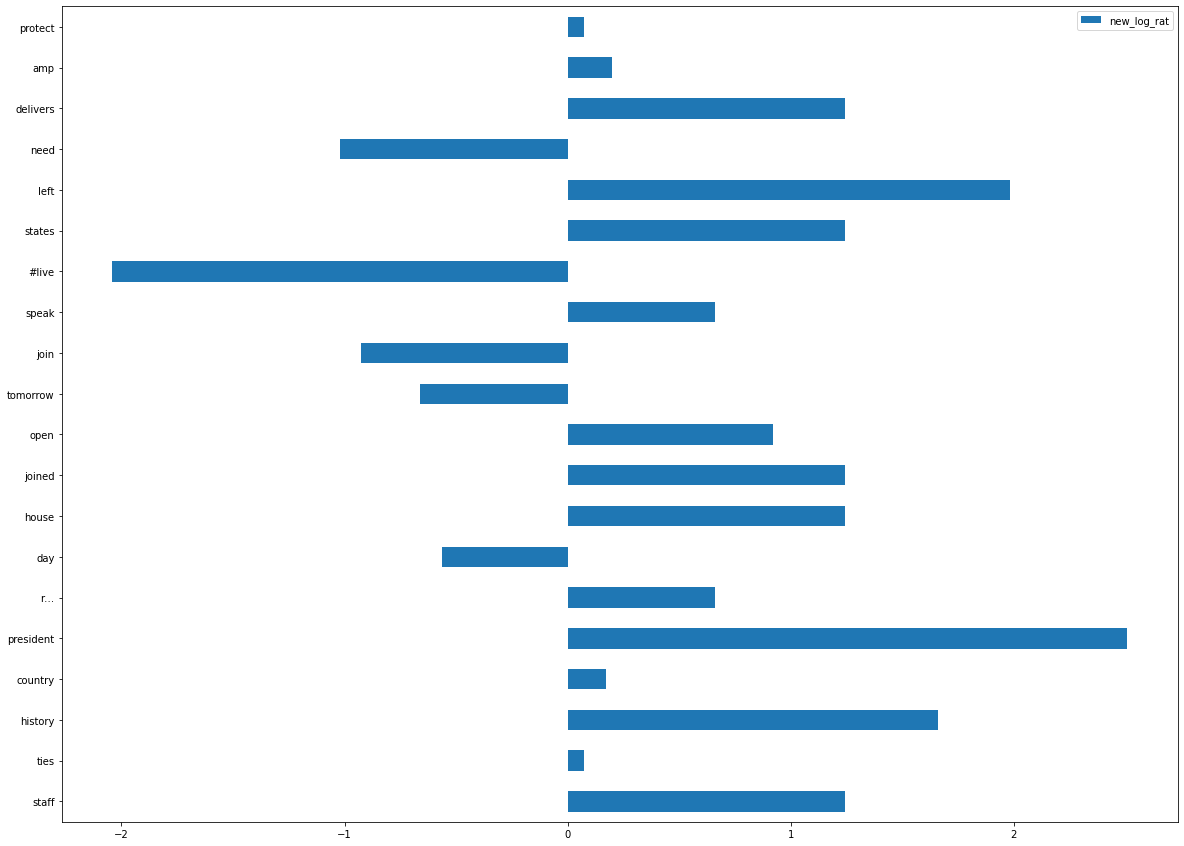

In [ ]:
df.plot.barh(y='new_log_rat', figsize=(20,15))

* **Listing the 20 words most strongly associated with each of the two users**

In [ ]:
df.index

Index(['staff', 'ties', 'history', 'country', 'president', 'r…', 'day',
       'house', 'joined', 'open', 'tomorrow', 'join', 'speak', '#live',
       'states', 'left', 'need', 'delivers', 'amp', 'protect'],
      dtype='object')

In [ ]:
print("The 20 words most strongly associated with each of the two users are {}".format(df.index))

The 20 words most strongly associated with each of the two users are Index(['staff', 'ties', 'history', 'country', 'president', 'r…', 'day',
       'house', 'joined', 'open', 'tomorrow', 'join', 'speak', '#live',
       'states', 'left', 'need', 'delivers', 'amp', 'protect'],
      dtype='object')


# **5) Using nltk vader module to calculate the sentiment of each tweet, and then for each of the two users, calculate the average 'compound' sentiment for all their tweets.**

In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## **Sentiment of each tweet of user 1 (Donald Trump).**

In [ ]:
sentence1 = df_user1['full_text'].tolist()

In [ ]:
analyzer = SentimentIntensityAnalyzer()
for sentence in sentence1:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

Tomorrow join me when i speak to   #LIVE   10am et #breakingnews #POTUS45 #… {'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296}
FDR’s own party told him you cannot PACK the United States Supreme Court it would permanently destroy the Court.   But now the Radical Left Democrats are pushing Biden to do this. He has zero chance against them! {'neg': 0.091, 'neu': 0.747, 'pos': 0.162, 'compound': 0.4635}
----------------------------------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
----------------------------------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
----------------------------------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Oklahoma we need  in Congress! She delivers for our Teachers amp Students and she will always protect your #2A amp Energy Jobs unlike her opponent who votes against our Oil amp Gas industry. Stephanie has my Complete and Total 

# Bar plot for all the average scores of `user 1`

In [ ]:
Sum_neg=0
Sum_neu=0
Sum_pos=0
Sum_cmpd=0

for sentence in sentence1:
    vs_neg = analyzer.polarity_scores(sentence)['neg']
    Sum_neg=Sum_neg+vs_neg

    vs_neu = analyzer.polarity_scores(sentence)['neu']
    Sum_neu=Sum_neu+vs_neu

    vs_pos = analyzer.polarity_scores(sentence)['pos']
    Sum_pos=Sum_pos+vs_pos

    vs_cmpd = analyzer.polarity_scores(sentence)['compound']
    Sum_cmpd=Sum_cmpd+vs_cmpd






avg_neg=round(Sum_neg/200,3)
avg_neu=round(Sum_neu/200,3)
avg_pos=round(Sum_pos/200,3)
avg_cmpd=round(Sum_cmpd/200,3)

In [ ]:
print(avg_neg)
print(avg_neu)
print(avg_pos)
print(avg_cmpd)

0.079
0.695
0.121
0.045


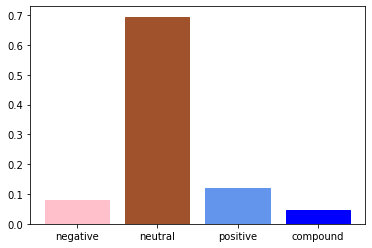

In [ ]:
import matplotlib.pyplot as plt
values = [avg_neg, avg_neu, avg_pos, avg_cmpd]
x = ('negative', 'neutral', 'positive','compound')
# Create a barplot.
bar_list = plt.bar(x, values)
# Set colours.
bar_list[0].set_color('pink')
bar_list[1].set_color('sienna')
bar_list[2].set_color('cornflowerblue')
bar_list[3].set_color('blue')
# Show graphic.
plt.show()

### **Therefore most of the `user 1` tweets have neutral sentiment**

## **Average 'compound' sentiment for all tweets of user 1 (Donald Trump).**

In [ ]:
Sum=0

for sentence in sentence1:
    vs = analyzer.polarity_scores(sentence)['compound']
    Sum=Sum+vs
avg_cmpd=round(Sum/200,3)
print("The average 'compound' sentiment for all tweets of user 1 (Donald Trump) is {}".format(avg_cmpd)    )



The average 'compound' sentiment for all tweets of user 1 (Donald Trump) is 0.045


# XXXXXXXXXXXXXXXX

## **Sentiment of each tweet of user 2 (Scott Morrison).**

In [ ]:
sentence2 = df_user2['full_text'].tolist()

In [ ]:
analyzer = SentimentIntensityAnalyzer()
for sentence in sentence2:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

Happy 50th anniversary of independence to our vuvale in Fiji! #Fiji50 🇦🇺🇫🇯  {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.6114}
Tax cuts for 11 million Australians have been secured with the passage of legislation through the Parliament today.

Ta… {'neg': 0.1, 'neu': 0.776, 'pos': 0.123, 'compound': 0.128}
Good news for families and our economy. 👇👇👇 #Budget2020 #auspol - {'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.4404}
No better candidate that Australia could ever put forward for Secretary-General of the  than . Was proud to announce our intention to formally nominate Mathias once he retires from the Parliament later this month.  {'neg': 0.064, 'neu': 0.853, 'pos': 0.083, 'compound': 0.1764}
We’re investing more in infrastructure now in #Budget2020 to create more jobs as part of our economic recovery plan for Australia. These investments in our local communities will support local jobs.  {'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'compound': 0.5859}
Chatting all thi

# Bar plot for all the average scores of `user 2`

In [ ]:
Sum_neg=0
Sum_neu=0
Sum_pos=0
Sum_cmpd=0

for sentence in sentence2:
    vs_neg = analyzer.polarity_scores(sentence)['neg']
    Sum_neg=Sum_neg+vs_neg

    vs_neu = analyzer.polarity_scores(sentence)['neu']
    Sum_neu=Sum_neu+vs_neu

    vs_pos = analyzer.polarity_scores(sentence)['pos']
    Sum_pos=Sum_pos+vs_pos

    vs_cmpd = analyzer.polarity_scores(sentence)['compound']
    Sum_cmpd=Sum_cmpd+vs_cmpd






avg_neg=round(Sum_neg/200,3)
avg_neu=round(Sum_neu/200,3)
avg_pos=round(Sum_pos/200,3)
avg_cmpd=round(Sum_cmpd/200,3)

In [ ]:
print(avg_neg)
print(avg_neu)
print(avg_pos)
print(avg_cmpd)

0.045
0.789
0.166
0.389


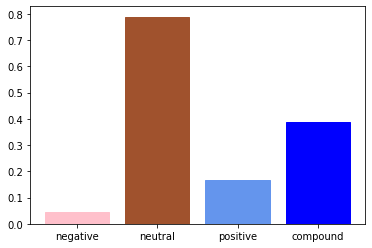

In [ ]:
import matplotlib.pyplot as plt
values = [avg_neg, avg_neu, avg_pos, avg_cmpd]
x = ('negative', 'neutral', 'positive','compound')
# Create a barplot.
bar_list = plt.bar(x, values)
# Set colours.
bar_list[0].set_color('pink')
bar_list[1].set_color('sienna')
bar_list[2].set_color('cornflowerblue')
bar_list[3].set_color('blue')
# Show graphic.
plt.show()

### **Therefore most of the `user 1` tweets have neutral sentiment followed by compound ones.**

## **Average 'compound' sentiment for all tweets of user 2 (Scott Morrison).**

In [ ]:
Sum=0

for sentence in sentence2:
    vs = analyzer.polarity_scores(sentence)['compound']
    Sum=Sum+vs
avg_cmpd=round(Sum/200,3)
print("The average 'compound' sentiment for all tweets of user 2 (Scott Morrison) is {}".format(avg_cmpd)    )



The average 'compound' sentiment for all tweets of user 2 (Scott Morrison) is 0.389


## About the Scoring

* The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

    It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

    1. positive sentiment: compound score >= 0.05
    2. neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
    3. negative sentiment: compound score <= -0.05


* The pos, neu, and neg scores are ratios for proportions of text that fall in each category (so these should all add up to be 1... or close to it with float operation). These are the most useful metrics if you want multidimensional measures of sentiment for a given sentence.


